In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import re
warnings.filterwarnings('ignore')

In [104]:
df_Train=pd.read_csv('Final_Train.csv')
df_Train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [105]:
df_Test=pd.read_csv('Final_Test.csv')
df_Test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [106]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [107]:
df_Train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [108]:
column=df_Train.columns
print(column)

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')


In [109]:
for i in column:
    print(i,"=",df_Train[i].nunique())

Qualification = 1420
Experience = 64
Rating = 51
Place = 877
Profile = 6
Miscellaneous_Info = 2998
Fees = 40


In [110]:
for i in column:
    print(i,"=",df_Train[i].unique())

Qualification = ['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
Experience = ['24 years experience' '12 years experience' '9 years experience'
 '20 years experience' '8 years experience' '42 years experience'
 '10 years experience' '14 years experience' '23 years experience'
 '5 years experience' '7 years experience' '21 years experience'
 '19 years experience' '41 years experience' '31 years experience'
 '25 years experience' '16 years experience' '15 years experience'
 '11 years experience' '22 years experience' '38 years experience'
 '6 years experience' '36 years experience' '13 years experience'
 '18 years experience' '46 years experience' '40 years experience'
 '49 years experience' '33 year

In [111]:
df_Train['Place'].value_counts().idxmax()

'HSR Layout, Bangalore'

In [112]:
df_Train['Experience'] = df_Train['Experience'].str.replace('years experience','').astype(int)

In [113]:
df_Train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [114]:
df_Train['Area']=df_Train['Place'].str.rsplit(',',1).str.get(0)
df_Train['City']=df_Train['Place'].str.rsplit(',',1).str.get(1)
df_Train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [115]:
def clean_text(text):
    text= str(text).lower()
    text= re.sub(r'[^a-z]'," ", text)
    text= re.sub(r'\s+', ' ', text)
    return text
df_Train['Qualification'] = df_Train['Qualification'].apply(clean_text)
df_Test['Qualification'] = df_Test['Qualification'].apply(clean_text)

def clean_place(text):
    text= str(text).lower()
    text= re.sub(r'[^a-z0-9]'," ", text)
    text= re.sub(r'\s+', ' ', text)
    return text

df_Train['Place'].fillna('missing', inplace=True)
df_Test['Place'].fillna('missing', inplace=True)
df_Train['Place']=df_Train['Place'].apply(clean_place)
df_Test['Place']=df_Test['Place'].apply(clean_place)

In [116]:
df_Train['Rating'].fillna('0%', inplace=True)
df_Test['Rating'].fillna('0%', inplace=True)

def clean_rating(text):
    text= re.sub(r'%','', str(text))
    return text
df_Train['Rating'] = df_Train['Rating'].apply(clean_rating)
df_Train['Rating'] = df_Train['Rating'].astype(int)

df_Test['Rating'] = df_Test['Rating'].apply(clean_rating)
df_Test['Rating'] = df_Test['Rating'].astype(int)

In [117]:
df_Train['Miscellaneous_Info'].fillna('missing', inplace=True)
df_Test['Miscellaneous_Info'].fillna('missing', inplace=True)

def get_feedback(feedback):
    feedback = re.findall(r'\d+ Feedback', str(feedback))
    if feedback ==[]:
        feedback = '0 Feedback'
        return feedback
    else:
        return feedback[0]
df_Train['Feedback'] = df_Train['Miscellaneous_Info'].apply(get_feedback)
df_Train['Feedback'] = df_Train['Feedback'].str.replace('Feedback','')
df_Train['Feedback'] = df_Train["Feedback"].astype(int)

df_Test['Feedback'] = df_Test['Miscellaneous_Info'].apply(get_feedback)
df_Test['Feedback'] = df_Test['Feedback'].str.replace('Feedback','')
df_Test['Feedback'] = df_Test["Feedback"].astype(int)

In [118]:
def get_fee(text):
    text = re.sub(r',', "", text)
    text = re.findall(r'₹\d+', text)
    if text !=[]:
        return text[0]
    else:
        return 0
df_Train["misc_Fess"] = df_Train['Miscellaneous_Info'].apply(get_fee)
df_Train['Misc_Fees'] = df_Train['Misc_Fees'].str.replace('₹','')
df_Train['Misc_Fees'].fillna(50, inplace=True)
df_Train['Misc_Fees']=df_Train['Misc_Fees'].astype(int)


df_Test["misc_Fess"] = df_Test['Miscellaneous_Info'].apply(get_fee)
df_Test['Misc_Fees'] = df_Test['Misc_Fees'].str.replace('₹','')
df_Test['Misc_Fees'].fillna(50, inplace=True)
df_Test['Misc_Fees']=df_Test['Misc_Fees'].astype(float)

KeyError: 'Misc_Fees'

In [119]:
def clean_misc(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9]',' ', text)
    text = re.sub(r'\s+',' ', text)
    return text

df_Train['Miscellaneous_Info']= df_Train['Miscellaneous_Info'].apply(clean_misc)
df_Test['Miscellaneous_Info']= df_Test['Miscellaneous_Info'].apply(clean_misc)

In [120]:
df_Train = pd.get_dummies(df_Train, columns=['Profile'])
df_Test = pd.get_dummies(df_Test, columns=['Profile'])

In [121]:
df_Train.head()

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Fees,Area,City,Feedback,misc_Fess,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,bhms md homeopathy,24,100,kakkanad ernakulam,100 16 feedback kakkanad ernakulam,100,Kakkanad,Ernakulam,16,0,0,0,0,0,0,1
1,bams md ayurveda medicine,12,98,whitefield bangalore,98 76 feedback whitefield bangalore,350,Whitefield,Bangalore,76,0,1,0,0,0,0,0
2,mbbs ms otorhinolaryngology,9,0,mathikere bel bangalore,missing,300,Mathikere - BEL,Bangalore,0,0,0,0,0,1,0,0
3,bsc zoology bams,12,0,bannerghatta road bangalore,bannerghatta road bangalore 250 available on s...,250,Bannerghatta Road,Bangalore,0,₹250,1,0,0,0,0,0
4,bams,20,100,keelkattalai chennai,100 4 feedback keelkattalai chennai,250,Keelkattalai,Chennai,4,0,1,0,0,0,0,0


In [125]:
df_Test.head()

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Feedback,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,Misc_Fees
0,mbbs,35 years experience,0,ghatkopar east mumbai,missing,0,0,0,0,0,1,0,0
1,mbbs diploma in otorhinolaryngology dlo,31 years experience,0,west marredpally hyderabad,missing,0,0,0,0,1,0,0,0
2,mbbs ddvl,40 years experience,70,kk nagar chennai,70 4 feedback kk nagar chennai,4,0,0,1,0,0,0,0
3,bams,0 years experience,0,new ashok nagar delhi,missing,0,1,0,0,0,0,0,0
4,bds mds conservative dentistry endodontics,16 years experience,100,kanakpura road bangalore,general dentistry conservative dentistry cosme...,0,0,1,0,0,0,0,0


In [25]:
df_Train.describe()

,Experience,Rating,Fees,Feedback,Misc_Fees,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,42.217245,307.944640,10.373427,64.313874,0.131857,0.234357,0.173461,0.122127,0.196779,0.141419
std,11.142798,47.340934,190.920373,49.603087,104.435438,0.338364,0.423632,0.378677,0.327460,0.397597,0.348483
min,0.000000,0.000000,5.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,150.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.000000,300.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,96.000000,500.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,66.000000,100.000000,950.000000,1782.000000,2500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df_Train.corr()

,Experience,Rating,Fees,Feedback,Misc_Fees,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
Experience,1.000000,-0.038569,0.002117,0.016938,0.004284,-0.042496,-0.201596,-0.096003,0.082435,0.335864,-0.070010
Rating,-0.038569,1.000000,0.153273,0.235785,-0.113014,-0.159901,0.226737,0.149791,-0.038771,-0.123012,-0.106363
Fees,0.002117,0.153273,1.000000,0.076751,0.016133,-0.140812,-0.202126,0.204426,0.155084,0.015463,-0.003072
Feedback,0.016938,0.235785,0.076751,1.000000,-0.026135,-0.040192,-0.057000,0.141812,0.007532,-0.022622,-0.027050
Misc_Fees,0.004284,-0.113014,0.016133,-0.026135,1.000000,-0.028492,-0.006244,-0.036277,0.023940,0.041255,0.005110
Profile_Ayurveda,-0.042496,-0.159901,-0.140812,-0.040192,-0.028492,1.000000,-0.215616,-0.178536,-0.145361,-0.192898,-0.158168
Profile_Dentist,-0.201596,0.226737,-0.202126,-0.057000,-0.006244,-0.215616,1.000000,-0.253451,-0.206355,-0.273840,-0.224538
Profile_Dermatologists,-0.096003,0.149791,0.204426,0.141812,-0.036277,-0.178536,-0.253451,1.000000,-0.170867,-0.226747,-0.185923
Profile_ENT Specialist,0.082435,-0.038771,0.155084,0.007532,0.023940,-0.145361,-0.206355,-0.170867,1.000000,-0.184613,-0.151375
Profile_General Medicine,0.335864,-0.123012,0.015463,-0.022622,0.041255,-0.192898,-0.273840,-0.226747,-0.184613,1.000000,-0.200879


In [30]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Qualification             5961 non-null   object
 1   Experience                5961 non-null   int32 
 2   Rating                    5961 non-null   int32 
 3   Place                     5961 non-null   object
 4   Miscellaneous_Info        5961 non-null   object
 5   Fees                      5961 non-null   int64 
 6   Area                      5936 non-null   object
 7   City                      5935 non-null   object
 8   Feedback                  5961 non-null   int32 
 9   Misc_Fees                 5961 non-null   int32 
 10  misc_Fess                 5961 non-null   object
 11  Profile_Ayurveda          5961 non-null   uint8 
 12  Profile_Dentist           5961 non-null   uint8 
 13  Profile_Dermatologists    5961 non-null   uint8 
 14  Profile_ENT Specialist  

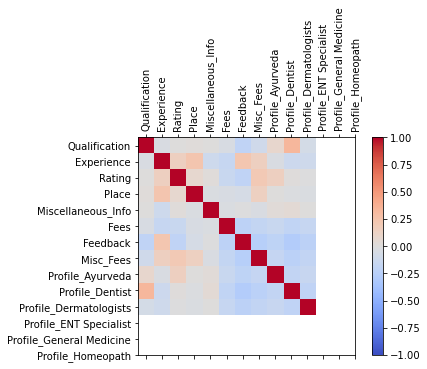

In [28]:

corr = df_Train.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_Train.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_Train.columns)
ax.set_yticklabels(df_Train.columns)
plt.show()


In [33]:
df_Train.skew()

Experience                   0.991089
Rating                       0.247186
Fees                         0.751870
Feedback                    15.552419
Misc_Fees                   10.735677
Profile_Ayurveda             2.176749
Profile_Dentist              1.254545
Profile_Dermatologists       1.725211
Profile_ENT Specialist       2.308676
Profile_General Medicine     1.525779
Profile_Homeopath            2.058645
dtype: float64

In [38]:
x=df_Train.drop(labels=['Fees'], axis=1)
y=df_Train["Fees"].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv=train_test_split(x,y, test_size=0.25, random_state=1)

In [40]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((4470, 16), (4470,), (1491, 16), (1491,))

In [41]:
X_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Miscellaneous_Info',
       'Area', 'City', 'Feedback', 'Misc_Fees', 'misc_Fess',
       'Profile_Ayurveda', 'Profile_Dentist', 'Profile_Dermatologists',
       'Profile_ENT Specialist', 'Profile_General Medicine',
       'Profile_Homeopath'],
      dtype='object')

In [55]:
X_train_qual = X_train['Qualification']
x_cv_qual = X_cv['Qualification']
X_train_place = X_train['Place']
X_cv_place = X_cv['Place']
X_train_misc = X_train['Miscellaneous_Info']
X_cv_misc = X_cv['Miscellaneous_Info']

from sklearn.feature_extraction.text import TfidfVectorizer

tf1 = TfidfVectorizer(ngram_range=(1,2), binary=True, token_pattern=r'\w{3,}')
X_train_qual = tf1.fit_transform(X_train_qual)
x_cv_qual = tf1.transform(x_cv_qual)

tf2 = TfidfVectorizer()
X_train_place = tf2.fit_transform(X_train_place)
X_cv_place = tf2.transform(X_cv_place)

tf3 = TfidfVectorizer(token_pattern=r'\w{1,}', ngram_range=(1,2))
X_train_misc = tf2.fit_transform(X_train_misc)
X_cv_misc = tf2.transform(X_cv_misc)


In [56]:
X_train_exp= np.array(X_train['Experience']).reshape(-1,1)
X_cv_exp = np.array(X_cv['Experience']).reshape(-1,1)

X_train_feedback= np.array(X_train['Feedback']).reshape(-1,1)
X_cv_feedback = np.array(X_cv['Feedback']).reshape(-1,1)

X_train_rating= np.array(X_train['Rating']).reshape(-1,1)
X_cv_rating = np.array(X_cv['Rating']).reshape(-1,1)

cols = ['Profile_Dentist','Profile_Dermatologists', "Profile_ENT Specialist", 'Profile_General Medicine', 'Profile_Homeopath']
X_train_prof = X_train[cols]
X_cv_prof = X_cv[cols]

X_train_miscfees= np.array(X_train['Misc_Fees']).reshape(-1,1)
X_cv_miscfees = np.array(X_cv['Misc_Fees']).reshape(-1,1)


In [57]:
from math import sqrt
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [58]:
from scipy.sparse import hstack
merged_train = hstack((X_train_exp, X_train_qual, X_train_prof, X_train_place, X_train_rating, X_train_misc, X_train_miscfees))
#merged_cv = hstack((X_cv_exp, x_cv_qual, X_cv_prof, X_cv_place, X_cv_rating, X_cv_misc, X_cv_miscfees))

In [59]:
merged_cv = hstack((X_cv_exp, x_cv_qual, X_cv_prof, X_cv_place, X_cv_rating, X_cv_misc, X_cv_miscfees))

In [60]:
merged_cv.shape, merged_train.shape

((1491, 4668), (4470, 4668))

In [61]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.02, gamma=100, max_depth=25, min_child_weight=1, max_delta_step=0, subsample=0.75, colsample_bylevel=0.95, colsample_bytree=0.70, reg_lambda=1)
xgb.fit(merged_train, y_train)
y_pred1 = xgb.predict(merged_cv)
y_pred1 = y_pred1.astype(int)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred1)))

RMSLE: 0.565922679857984


In [62]:
import lightgbm as lgb
train_data = lgb.Dataset(merged_train, label=y_train)
test_data = lgb.Dataset(merged_cv, label =y_cv)
param= {'objective': 'regression', 'boosting':'dart','num_iterations': 152,'learning_rate':0.1, 'num_leves': 52,'max_depth':28,'min_data_in_leaf':3,
       'feature_fraction':0.66, 'feature_fraction_seed':10,'drop_seed':4,'alpha':100,'max_bin':7,'min_data_in_bin':45,'metric':'12_root'}
lgbm=lgb.train(params=param,verbose_eval=0,
              train_set=train_data, valid_sets=[test_data])
y_pred2 = lgbm.predict(merged_cv)
print('RMSLE:',sqrt(mean_squared_log_error(y_cv,y_pred2)))

[LightGBM] [Warning] Unknown parameter: num_leves
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: num_leves
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.119424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4045
[LightGBM] [Info] Number of data points in the train set: 4470, number of used features: 1878
[LightGBM] [Warning] Unknown parameter: num_leves
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 307.347651
RMSLE: 0.5676664521295498


In [66]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(base_estimator=None,
                     n_estimators=80,
                     max_samples=1.0,
                     max_features=1.0,
                     bootstrap=True,
                     bootstrap_features=True,
                     oob_score=True,
                     n_jobs=None,
                     random_state=13,
                     verbose=0)
br.fit(merged_train, y_train)
y_pred5 = br.predict(merged_cv)
print('RMSLE:',sqrt(mean_squared_log_error(y_cv,y_pred5)))
print('RMSLE:',sqrt(mean_squared_error(y_cv,y_pred5)))

RMSLE: 0.5820181498338146
RMSLE: 161.48371326672338


In [67]:
from scipy.sparse import hstack
merged_train = hstack((X_train_exp, X_train_qual, X_train_prof, X_train_place, X_train_rating, X_train_misc, X_train_miscfees))
merged_cv = hstack((X_cv_exp, x_cv_qual, X_cv_prof, X_cv_place, X_cv_rating, X_cv_misc, X_cv_miscfees))

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
gb= GradientBoostingRegressor(loss= 'lad', learning_rate=0.2,random_state=10,n_estimators=92,max_depth=11,subsample=1.0,min_samples_split=40,
                             min_samples_leaf=1, max_features='auto')
gb.fit(merged_train, y_train)
y_pred3 = gb.predict(merged_cv)
print("RMSLE:", sqrt(mean_squared_log_error(y_cv,y_pred3)))

RMSLE: 0.5761461648331591


In [70]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=29,  
                           criterion='mse', 
                           max_depth=58,  
                           min_samples_split=5, 
                           min_samples_leaf=2, 
                           min_weight_fraction_leaf=0.0, 
                           max_features='auto', 
                           max_leaf_nodes=None, 
                           min_impurity_decrease=0.20,  
                           bootstrap=True, 
                           oob_score=True, 
                           n_jobs=-1, 
                           random_state=11)
rf.fit(merged_train, y_train)
y_pred4 = rf.predict(merged_cv)
print("RMSLE:", sqrt(mean_squared_log_error(y_cv,y_pred4)))

RMSLE: 0.595601857612222


In [71]:
y_predx = y_pred1*.4+ y_pred2*0.5 + y_pred3*0.1
y_predx = y_predx.astype(int)
print("RMSLE:", sqrt(mean_squared_log_error(y_cv,y_predx)))

RMSLE: 0.5580512869562205


In [72]:
y_predy = y_pred1*0.40+ y_pred2*0.45 + y_pred3*0.10 + y_pred5*0.05
y_predy = y_predy.astype(int)
print("RMSLE:", sqrt(mean_squared_log_error(y_cv,y_predy)))

RMSLE: 0.5582700610533077


In [73]:
y_pred = y_predx*.98 + y_predy*0.02
y_pred = y_pred.astype(int)
print("RMSLE:", sqrt(mean_squared_log_error(y_cv,y_pred)))

RMSLE: 0.5579401996301903


In [130]:
#saving the model

import joblib


In [132]:
# Save the model as a pickle in a file 
joblib.dump(y_pred, 'Doctor_cons.pkl') 


['Doctor_cons.pkl']